In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

## Let's just do efficiency and fix it

This experimet is centered around the adjustment of the 'efficiency' of the models. That is, the evolution of the coupling coefficient over time

In [3]:
#Loading all of the parameters needed for the simulation of all four models
params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()


k = 0.012
k_izh = 0.04
k_ML = 0.008


Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1
order = 2


y0 = [-70,-70]
u0 = [0.0,0.0]
w0 = [0.0007223855976593603, 0.0007223855976593603]
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 


#time parameters
t_final = 4000
dt = 0.01

##### HH model simulation

In [4]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))


#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_HH_total_1 = np.zeros((len(f),len(t)))
data_HH_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 0.4 + 0.35*np.sin(2 * np.pi * f[i] * t)


    #computing and storing the simulation
    data4b_HH, completeHH_4b, a = project.models.HH_Neuron_Pairs(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    data_HH_total_1[i] = data4b_HH[:,0]
    data_HH_total_2[i] = data4b_HH[:,1]
    end = len(data4b_HH)


    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )


        time_diff = project.utils.phases(data4b_HH[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

    else:
        coef[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )


        time_diff = project.utils.phases(data4b_HH[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_HH_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fHH = f
coefHH = coef
phasesHH = phases_test

##### LIF model simulation

In [5]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_IF_total_1 = np.zeros((len(f),len(t)))
data_IF_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 0.4+ 0.35*np.sin(2 * np.pi * f[i] * t)

    
    #computing and storing the simulation
    data4b_IF, complete_IF_4b, a = project.models.LIF_Neuron_Pairs(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    data_IF_total_1[i] = data4b_IF[:,0]
    data_IF_total_2[i] = data4b_IF[:,1]


    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )


        time_diff = project.utils.phases(data4b_IF[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
            
    else:
        coef[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )


        time_diff = project.utils.phases(data4b_IF[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_IF_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fIF= f 
coefIF = coef
phasesIF = phases_test

##### IZH model simulation

In [6]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))


#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_IZH_total_1 = np.zeros((len(f),len(t)))
data_IZH_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)


    #computing and storing the simulation
    data4b_Ish, complete_Ish_4b, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    data_IZH_total_1[i] = data4b_Ish[:,0]
    data_IZH_total_2[i] = data4b_Ish[:,1]
    
    
    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )


        time_diff  = project.utils.phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        coef[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )


        time_diff  = project.utils.phases(data4b_Ish[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_IZH_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fISH = f
coefISH = coef
phasesISH= phases_test

##### ML model simulation

In [7]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))


#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_ML_total_1 = np.zeros((len(f),len(t)))
data_ML_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 0.3 + 0.4*np.sin(2 * np.pi * f[i] * t)


    #computing and storing the simulation
    data4b_ML, complete_ML_4b, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    data_ML_total_1[i] = data4b_ML[:,0]
    data_ML_total_2[i] = data4b_ML[:,1]

    
    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )


        time_diff = project.utils.phases(data4b_ML[5000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    elif i == 9:
        coef[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )


        time_diff = project.utils.phases(data4b_ML[70000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        coef[i] = ( np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]) ) / ( np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )


        time_diff = project.utils.phases(data4b_ML[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_ML_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fML= f 
coefML = coef
phasesML= phases_test

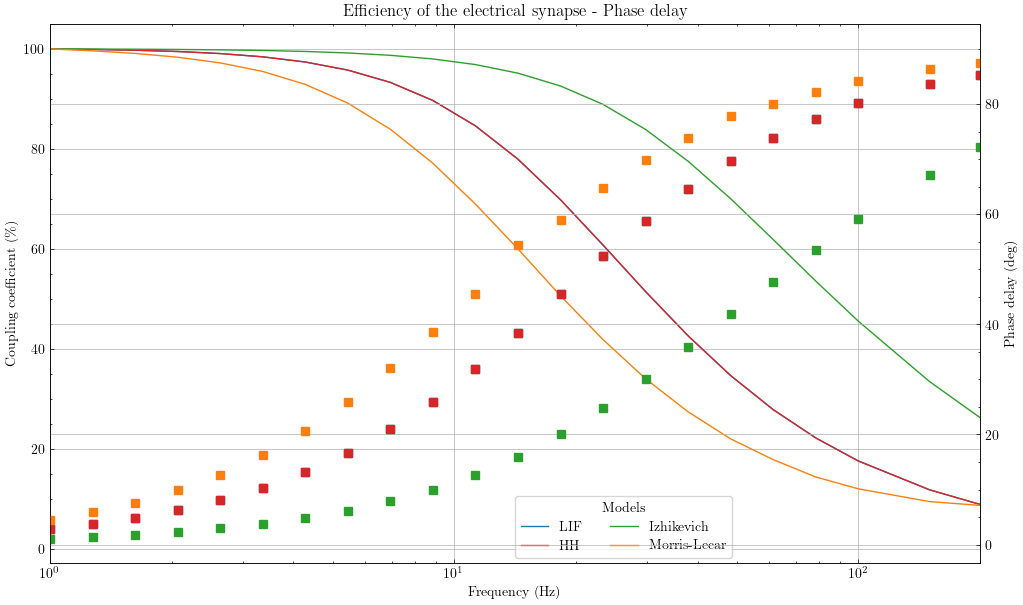

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,200)

ax2.set_ylabel('Phase delay (deg)')

ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,coefIF, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,coefHH, color = 'tab:red',label= 'HH')
ax1.plot(fISH, coefISH,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,coefML, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = (0.5,0.01),frameon=True)

##### Absolute transmission

One way to check the problem is not caused by the normalisation of the coefficients, we are plotting the absolute transmission

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Absolute values')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient')
ax1.set_xlim(0,900)


ax1.plot(fIF,coef_IF_og, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,coef_HH_og, color = 'tab:red',label= 'HH')
ax1.plot(fISH, coef_IZH_og,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,coef_ML_og, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = 'lower center')

##### Voltage traces

After obtaining the resulting efficiency, one way to make sure we are still in a transient state is to look at the traces for the voltage. Looking at them could also give
us insight as to their differences

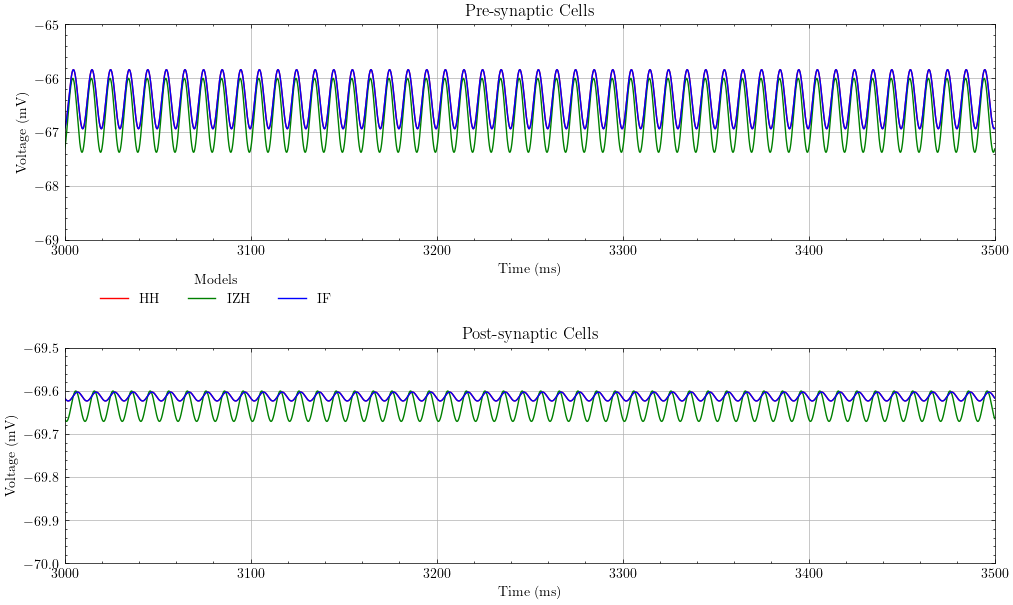

In [22]:
time = np.linspace(0,t_final,int(t_final/dt))
fig, (ax1, ax2) = plt.subplots(2,1)

plt.title('Voltage traces Comparisson for frequency %f', f[19])
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (ms)')
ax2.set_xlabel('Time (ms) ')
ax1.set_ylabel('Voltage (mV)')
ax2.set_ylabel('Voltage (mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')

ax1.title.set_text('Pre-synaptic Cells')
ax2.title.set_text('Post-synaptic Cells')

ax1.plot(time,data_HH_total_1[19,:], color = 'red', label = 'HH')
ax1.plot(time,data_IZH_total_1[19,:], color= 'green', label = 'IZH')
ax1.plot(time,data_IF_total_1[19,:], color = 'blue', label = 'IF')
ax1.set_xlim(3000,3500)
ax1.set_ylim(-69,-65)

ax2.plot(time,data_HH_total_2[19,:], color = 'red')
ax2.plot(time,data_IZH_total_2[19,:], color= 'green')
ax2.plot(time,data_IF_total_2[19,:], color = 'blue')
ax2.set_xlim(3000,3500)
ax2.set_ylim(-70,-69.5)

ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 3 )
plt.show()

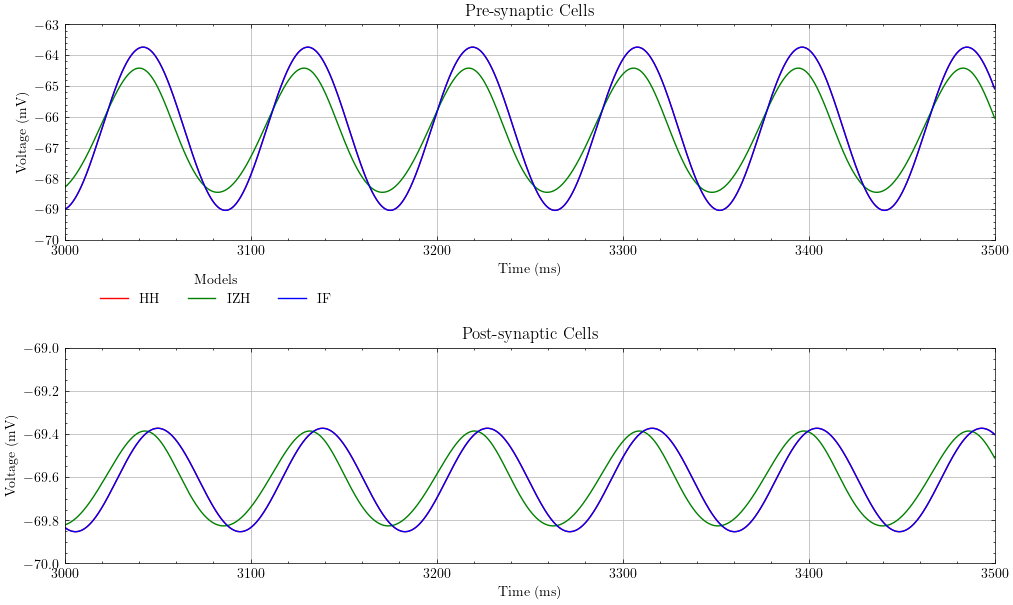

In [26]:
time = np.linspace(0,t_final,int(t_final/dt))
fig, (ax1, ax2) = plt.subplots(2,1)

plt.title('Voltage traces Comparisson for frequency %f', f[10])
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (ms)')
ax2.set_xlabel('Time (ms) ')
ax1.set_ylabel('Voltage (mV)')
ax2.set_ylabel('Voltage (mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')

ax1.title.set_text('Pre-synaptic Cells')
ax2.title.set_text('Post-synaptic Cells')

ax1.plot(time,data_HH_total_1[10,:], color = 'red', label = 'HH')
ax1.plot(time,data_IZH_total_1[10,:], color= 'green', label = 'IZH')
ax1.plot(time,data_IF_total_1[10,:], color = 'blue', label = 'IF')
ax1.set_xlim(3000,3500)
ax1.set_ylim(-70,-63)

ax2.plot(time,data_HH_total_2[10,:], color = 'red')
ax2.plot(time,data_IZH_total_2[10,:], color= 'green')
ax2.plot(time,data_IF_total_2[10,:], color = 'blue')
ax2.set_xlim(3000,3500)
ax2.set_ylim(-70,-69.)

ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 3 )
plt.show()

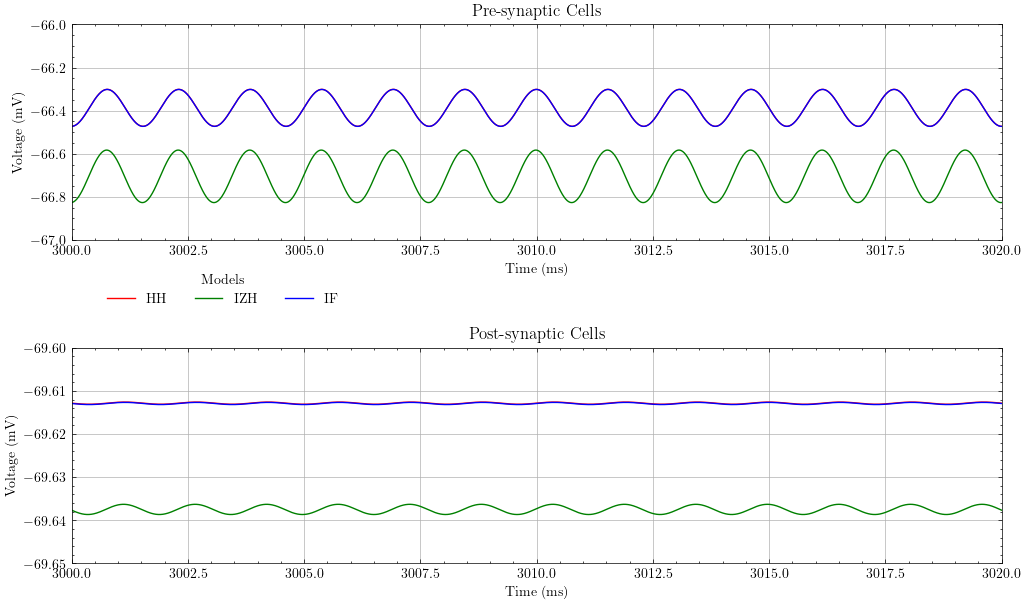

In [35]:
time = np.linspace(0,t_final,int(t_final/dt))
fig, (ax1, ax2) = plt.subplots(2,1)

plt.title('Voltage traces Comparisson for frequency %f', f[30])
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (ms)')
ax2.set_xlabel('Time (ms) ')
ax1.set_ylabel('Voltage (mV)')
ax2.set_ylabel('Voltage (mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')

ax1.title.set_text('Pre-synaptic Cells')
ax2.title.set_text('Post-synaptic Cells')

ax1.plot(time,data_HH_total_1[30,:], color = 'red', label = 'HH')
ax1.plot(time,data_IZH_total_1[30,:], color= 'green', label = 'IZH')
ax1.plot(time,data_IF_total_1[30,:], color = 'blue', label = 'IF')
ax1.set_xlim(3000,3020)
ax1.set_ylim(-67,-66)

ax2.plot(time,data_HH_total_2[30,:], color = 'red')
ax2.plot(time,data_IZH_total_2[30,:], color= 'green')
ax2.plot(time,data_IF_total_2[30,:], color = 'blue')
ax2.set_xlim(3000,3020)
ax2.set_ylim(-69.65,-69.6)

ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 3 )
plt.show()

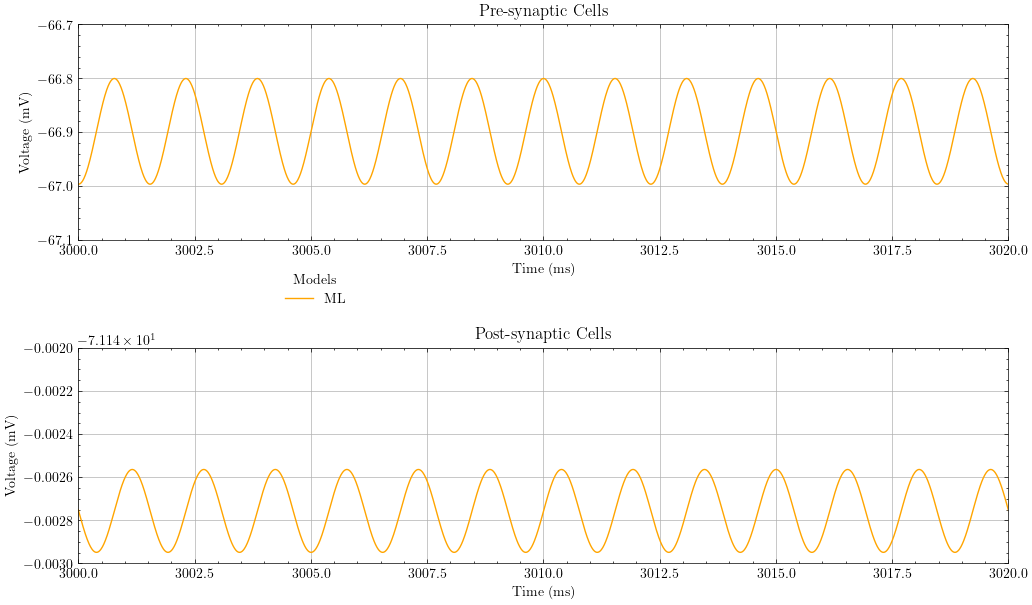

In [42]:
time = np.linspace(0,t_final,int(t_final/dt))
fig, (ax1, ax2) = plt.subplots(2,1)

plt.title('Voltage traces Comparisson for frequency %f', f[30])
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (ms)')
ax2.set_xlabel('Time (ms) ')
ax1.set_ylabel('Voltage (mV)')
ax2.set_ylabel('Voltage (mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')

ax1.title.set_text('Pre-synaptic Cells')
ax2.title.set_text('Post-synaptic Cells')


ax1.plot(time,data_ML_total_1[30,:], color = 'orange' , label = 'ML')
ax1.set_xlim(3000,3020)
ax1.set_ylim(-67.1,-66.7)


ax2.plot(time,data_ML_total_2[30,:], color = 'orange' )
ax2.set_xlim(3000,3020)
ax2.set_ylim(-71.143,-71.142)

ax1.grid()
ax2.grid()
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 3 )
plt.show()

##### Past tries

Below there are experiments done to obtain the same thing using different values for gap junction strength, to check if that caused any difference. 
The results were that it didn't. 
The code is not commented, nor cleanned up, but the structure is the same than the one used in the previous experiments

In [5]:
t_final = 4000
dt = 0.01
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


data_HH_total_1 = np.zeros((len(f),len(t)))
data_HH_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 0.3 + 0.33*np.sin(2 * np.pi * f[i] * t)
    data4b_HH, completeHH_4b, a = project.models.HH_Neuron_Pairs(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    data_HH_total_1[i] = data4b_HH[:,0]
    data_HH_total_2[i] = data4b_HH[:,1]

    end = len(data4b_HH)
    if i < 9:
        mean[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )
        #print(np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]), np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]))
        time_diff = project.utils.phases(data4b_HH[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

    else:
        mean[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )
        time_diff = project.utils.phases(data4b_HH[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

f = 1000*f 
mean_HH_og = mean
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100

fHH = f
meanHH = mean 
phasesHH = phases_test

In [6]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
y0 = [-70,-70]
residue = 0

data_IF_total_1 = np.zeros((len(f),len(t)))
data_IF_total_2 = np.zeros((len(f),len(t)))

for i in range(0,len(f)):
    I[:,0] = 0.3+ 0.33*np.sin(2 * np.pi * f[i] * t)
    data4b_IF, complete_IF_4b, a = project.models.LIF_Neuron_Pairs(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    data_IF_total_1[i] = data4b_IF[:,0]
    data_IF_total_2[i] = data4b_IF[:,1]

    if i < 9:
        mean[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )
        time_diff = project.utils.phases(data4b_IF[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        mean[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )
        time_diff = project.utils.phases(data4b_IF[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

f = 1000*f 
mean_IF_og = mean
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100
fIF= f 
meanIF = mean 
phasesIF = phases_test

In [14]:

t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))
k_izh = 0.035
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0

data_IZH_total_1 = np.zeros((len(f),len(t)))
data_IZH_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    data_IZH_total_1[i] = data4b_Ish[:,0]
    data_IZH_total_2[i] = data4b_Ish[:,1]

    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff  = project.utils.phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff  = project.utils.phases(data4b_Ish[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
f = 1000*f 
mean_IZH_og = mean
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH = f
meanISH = mean 
phasesISH= phases_test

In [15]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))
k_ML = 0.0057
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
residue = 0
phases_test = np.zeros((len(f),1))

data_ML_total_1 = np.zeros((len(f),len(t)))
data_ML_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 0.3 + 0.4*np.sin(2 * np.pi * f[i] * t)
    data4b_ML, complete_ML_4b, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    data_ML_total_1[i] = data4b_ML[:,0]
    data_ML_total_2[i] = data4b_ML[:,1]
    if i < 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff = project.utils.phases(data4b_ML[5000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    elif i == 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff = project.utils.phases(data4b_ML[70000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        mean[i] = ( np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]) ) / ( np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )
        #print(np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]),np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )
        time_diff = project.utils.phases(data4b_ML[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
f = 1000*f 
mean_ML_og = mean

mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]


mean[0] = 100
fML= f 
meanML = mean 
phasesML= phases_test

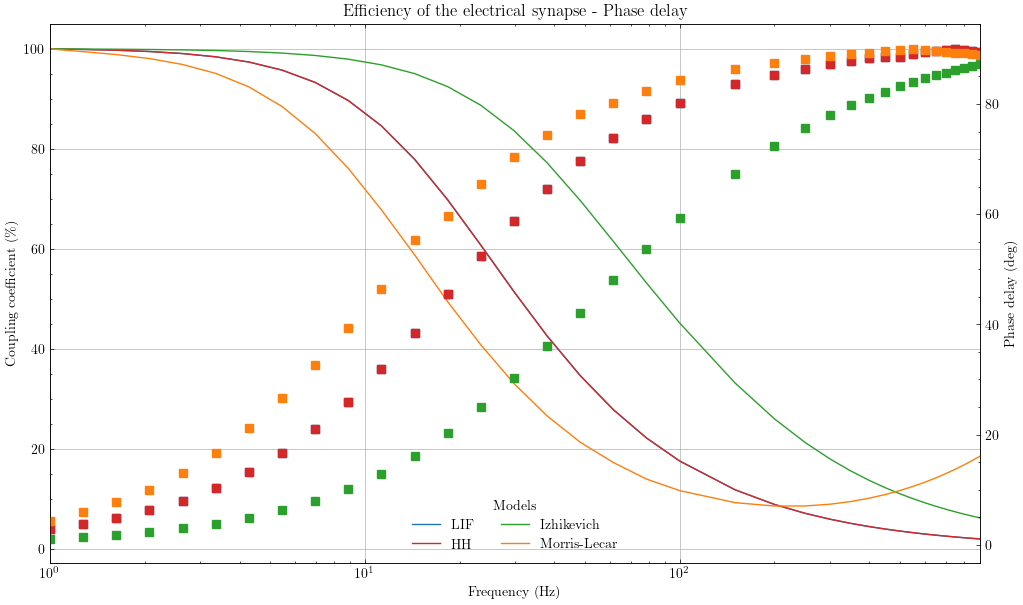

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,900)

ax2.set_ylabel('Phase delay (deg)')

ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,meanIF, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,meanHH, color = 'tab:red',label= 'HH')
ax1.plot(fISH, meanISH,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,meanML, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = 'lower center')
ax1.grid()

/tmp/ipykernel_3462/1180647570.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0,900)


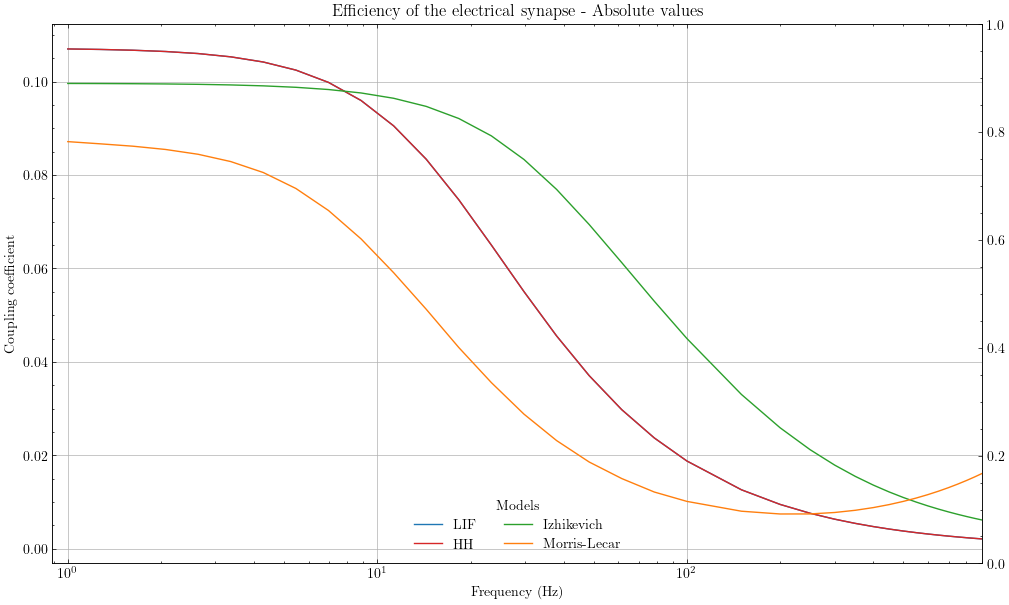

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Absolute values')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient')
ax1.set_xlim(0,900)

#ax2.set_ylabel('Phase delay (deg)')

#ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
#ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
#ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
#ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,mean_IF_og, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,mean_HH_og, color = 'tab:red',label= 'HH')
ax1.plot(fISH, mean_IZH_og,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,mean_ML_og, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = 'lower center')
ax1.grid()